In [105]:
# Common imports

import matplotlib.pyplot as plt
import numpy as np

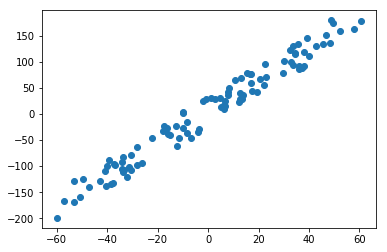

In [121]:
# Generate a dataset

import random

def f(x):
    slope = 3
    yIntersept = 4
    yVariance = 30
    return (slope * x) + yIntersept + random.uniform(-yVariance, yVariance)

xVariance = 15
features = [x + random.uniform(-xVariance, xVariance) for x in range(-50, 50)]
outputs = list(map(f, features))

trainingSet = list(zip(features, outputs))

plt.scatter(features, outputs)

In [1]:
# introduce a cost function

def predict(feature, parameters):
    # TODO: vectorize in more complex case
    return parameters[0] + (parameters[1] * feature)

def calcSquaredDiff(example, parameters):
    diff = predict(example[0], parameters) - example[1]
    return diff ** 2

def cost(dataSet, parameters):
    squaredDiff = map(lambda example: calcSquaredDiff(example, parameters), dataSet)
    return sum(squaredDiff) / (2 * len(dataSet))

cost([(1, 2), (2, 5)], [0, 0]) == 7.25

True

[0.38216545957876896, 2.997771393757647]

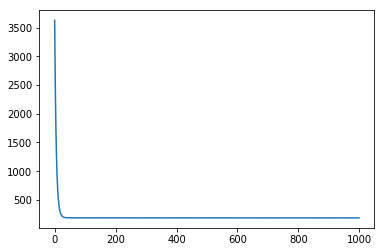

In [119]:
# minimize the cost function

def costPrime(example, parameters):
    return (predict(example[0], parameters) - example[1]) * example[0]
def costPrimeBias(example, parameters):
    return (predict(example[0], parameters) - example[1])

def loss(dataSet, parameters, costPrimeFunc):
    errors = map(lambda example: costPrimeFunc(example, parameters), dataSet)
    return sum(errors) / len(dataSet)

def minimize(dataSet, parameters, learningRate):    
    parameters[0] -= learningRate * loss(dataSet, parameters, costPrimeBias)
    parameters[1] -= learningRate * loss(dataSet, parameters, costPrime)
    
    return parameters


parameters = [0, 0]
learningRate = 0.0001
jOverIterations = []
for numOfIteration in range(1000):
    parameters = minimize(trainingSet, parameters, learningRate)
    J = cost(trainingSet, parameters)
    
    jOverIterations.append((numOfIteration, J))

plt.plot(*zip(*jOverIterations))
parameters

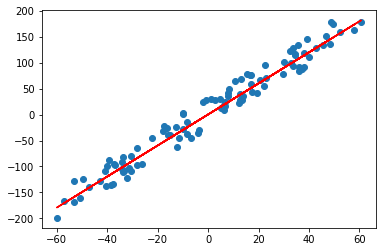

In [133]:
features = list(zip(*trainingSet))[0]
plt.scatter(*zip(*trainingSet))
plt.plot(features, list(map(lambda example: predict(example, parameters), features)), 'r')

# TODO:
#    create github repo
#    split to train and test
#    plot learning curve for train and test
